In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Prepare data
breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

#Scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

print(y_train.shape[0])

y_train = y_train.view(y_train.shape[0],1)
print(y_train)
y_test = y_test.view(y_test.shape[0],1)

455
tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
  

In [4]:
# Build model
# f = wx + b, sigmoid func
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# Loss and optimizer
learning_rate = 1e-2
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Training loop
num_epochs = 100
train_loss = []
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    # Backward pass
    loss.backward()
    
    # Updates
    optimizer.step()
    
    # zero grad
    optimizer.zero_grad()
    
    if (epoch + 1)%10 == 0:
        print('Epoch: [{}/{}]\t Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        train_loss.append(loss.item())
print('Done !')
print('='*50)

# Test 
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy of model :{acc:.4f}')

Epoch: [10/100]	 Loss: 0.5613
Epoch: [20/100]	 Loss: 0.4638
Epoch: [30/100]	 Loss: 0.4011
Epoch: [40/100]	 Loss: 0.3576
Epoch: [50/100]	 Loss: 0.3255
Epoch: [60/100]	 Loss: 0.3007
Epoch: [70/100]	 Loss: 0.2809
Epoch: [80/100]	 Loss: 0.2647
Epoch: [90/100]	 Loss: 0.2510
Epoch: [100/100]	 Loss: 0.2394
Done !
Accuracy of model :0.9035


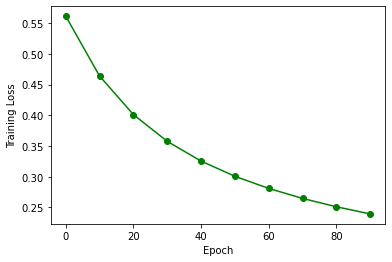

In [8]:
epochs_train = [i for i in range(0,100,10)]
plt.plot(epochs_train, train_loss, 'go-')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()